In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import graphviz

In [2]:
df_total = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_total.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_total due to lack of information
df_total = df_total[~(df_total["PATIENT_NO"].isin([172, 173, 174]))]

df_train = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_test.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_test due to lack of information
df_test = df_test[~(df_test["PATIENT_NO"].isin([172, 173, 174]))]

In [3]:
df_total.info()
df_total.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 17 columns):
PATIENT_NO            171 non-null int64
AGE                   171 non-null float64
SEX                   171 non-null int64
ORIGIN_EUROPE         171 non-null int64
ORIGIN_CHINA          171 non-null int64
ORIGIN_US             171 non-null int64
ORIGIN_ASEAN          171 non-null int64
ORIGIN_DOMESTIC       171 non-null int64
DAYS_OF_ONSET         171 non-null int64
ONSET_FEVER           171 non-null int64
ONSET_COUGH           171 non-null int64
ONSET_TIRED           171 non-null int64
ONSET_SORETHROAT      171 non-null int64
ONSET_RESPIRATORY     171 non-null int64
BACKGROUND_DISEASE    171 non-null int64
HOSPITAL              171 non-null int64
LOS                   20 non-null float64
dtypes: float64(2), int64(15)
memory usage: 24.0 KB


PATIENT_NO   AGE  SEX  ORIGIN_EUROPE  ORIGIN_CHINA  ORIGIN_US  \
166         167  20.0    0              1             0          0   
167         168  49.0    0              0             0          0   
168         169  49.0    0              0             0          0   
169         170  27.0    1              0             0          0   
170         171  19.0    0              0             0          1   

     ORIGIN_ASEAN  ORIGIN_DOMESTIC  DAYS_OF_ONSET  ONSET_FEVER  ONSET_COUGH  \
166             0                0              0            0            0   
167             0                1              0            0            0   
168             0                1              0            0            0   
169             0                1              5            1            0   
170             0                0              0            0            0   

     ONSET_TIRED  ONSET_SORETHROAT  ONSET_RESPIRATORY  BACKGROUND_DISEASE  \
166            0                 0                  0                   0   
167            0                 0                  0                   0   
168            0                 0                  0                   0   
169            0                 0                  0                   0   
170            0                 0                  0                   0   

     HOSPITAL  LOS  
166         1  NaN  
167         1  NaN  
168         1  NaN  
169         0  NaN  
170         1  NaN

In [4]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
PATIENT_NO            20 non-null int64
AGE                   20 non-null float64
SEX                   20 non-null int64
ORIGIN_EUROPE         20 non-null int64
ORIGIN_CHINA          20 non-null int64
ORIGIN_US             20 non-null int64
ORIGIN_ASEAN          20 non-null int64
ORIGIN_DOMESTIC       20 non-null int64
DAYS_OF_ONSET         20 non-null int64
ONSET_FEVER           20 non-null int64
ONSET_COUGH           20 non-null int64
ONSET_TIRED           20 non-null int64
ONSET_SORETHROAT      20 non-null int64
ONSET_RESPIRATORY     20 non-null int64
BACKGROUND_DISEASE    20 non-null int64
HOSPITAL              20 non-null int64
LOS                   20 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.7 KB


PATIENT_NO   AGE  SEX  ORIGIN_EUROPE  ORIGIN_CHINA  ORIGIN_US  \
0           1  66.0    1              0             1          0   
1           2  28.0    1              0             1          0   
2           3  25.0    0              0             1          0   
3           4  29.0    1              0             1          0   
4           5  23.0    0              0             1          0   

   ORIGIN_ASEAN  ORIGIN_DOMESTIC  DAYS_OF_ONSET  ONSET_FEVER  ONSET_COUGH  \
0             0                0              6            0            0   
1             0                0              3            0            0   
2             0                0              7            0            0   
3             0                0              9            0            0   
4             0                0              5            0            0   

   ONSET_TIRED  ONSET_SORETHROAT  ONSET_RESPIRATORY  BACKGROUND_DISEASE  \
0            0                 0                  0                   2   
1            0                 0                  0                   0   
2            0                 0                  0                   0   
3            0                 0                  0                   0   
4            0                 0                  0                   0   

   HOSPITAL  LOS  
0         1   20  
1         1   12  
2         0    4  
3         0   19  
4         0   11

In [5]:
df_test.info()
df_test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 17 columns):
PATIENT_NO            151 non-null int64
AGE                   151 non-null float64
SEX                   151 non-null int64
ORIGIN_EUROPE         151 non-null int64
ORIGIN_CHINA          151 non-null int64
ORIGIN_US             151 non-null int64
ORIGIN_ASEAN          151 non-null int64
ORIGIN_DOMESTIC       151 non-null int64
DAYS_OF_ONSET         151 non-null int64
ONSET_FEVER           151 non-null int64
ONSET_COUGH           151 non-null int64
ONSET_TIRED           151 non-null int64
ONSET_SORETHROAT      151 non-null int64
ONSET_RESPIRATORY     151 non-null int64
BACKGROUND_DISEASE    151 non-null int64
HOSPITAL              151 non-null int64
LOS                   0 non-null float64
dtypes: float64(2), int64(15)
memory usage: 21.2 KB


PATIENT_NO   AGE  SEX  ORIGIN_EUROPE  ORIGIN_CHINA  ORIGIN_US  \
146         167  20.0    0              1             0          0   
147         168  49.0    0              0             0          0   
148         169  49.0    0              0             0          0   
149         170  27.0    1              0             0          0   
150         171  19.0    0              0             0          1   

     ORIGIN_ASEAN  ORIGIN_DOMESTIC  DAYS_OF_ONSET  ONSET_FEVER  ONSET_COUGH  \
146             0                0              0            0            0   
147             0                1              0            0            0   
148             0                1              0            0            0   
149             0                1              5            1            0   
150             0                0              0            0            0   

     ONSET_TIRED  ONSET_SORETHROAT  ONSET_RESPIRATORY  BACKGROUND_DISEASE  \
146            0                 0                  0                   0   
147            0                 0                  0                   0   
148            0                 0                  0                   0   
149            0                 0                  0                   0   
150            0                 0                  0                   0   

     HOSPITAL  LOS  
146         1  NaN  
147         1  NaN  
148         1  NaN  
149         0  NaN  
150         1  NaN

In [6]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [7]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [8]:
X_train.describe()


AGE        SEX  ORIGIN_EUROPE  ORIGIN_CHINA  ORIGIN_US  \
count  20.000000  20.000000      20.000000     20.000000  20.000000   
mean   37.312500   0.400000       0.100000      0.450000   0.050000   
std    18.727421   0.502625       0.307794      0.510418   0.223607   
min     0.250000   0.000000       0.000000      0.000000   0.000000   
25%    26.500000   0.000000       0.000000      0.000000   0.000000   
50%    29.000000   0.000000       0.000000      0.000000   0.000000   
75%    51.250000   1.000000       0.000000      1.000000   0.000000   
max    73.000000   1.000000       1.000000      1.000000   1.000000   

       ORIGIN_ASEAN  ORIGIN_DOMESTIC  DAYS_OF_ONSET  ONSET_FEVER  ONSET_COUGH  \
count          20.0        20.000000      20.000000         20.0    20.000000   
mean            0.0         0.400000       4.450000          0.0     0.100000   
std             0.0         0.502625       3.332061          0.0     0.307794   
min             0.0         0.000000       0.000000          0.0     0.000000   
25%             0.0         0.000000       2.000000          0.0     0.000000   
50%             0.0         0.000000       4.500000          0.0     0.000000   
75%             0.0         1.000000       7.000000          0.0     0.000000   
max             0.0         1.000000      13.000000          0.0     1.000000   

       ONSET_TIRED  ONSET_SORETHROAT  ONSET_RESPIRATORY  BACKGROUND_DISEASE  \
count    20.000000         20.000000               20.0            20.00000   
mean      0.050000          0.050000                0.0             0.15000   
std       0.223607          0.223607                0.0             0.48936   
min       0.000000          0.000000                0.0             0.00000   
25%       0.000000          0.000000                0.0             0.00000   
50%       0.000000          0.000000                0.0             0.00000   
75%       0.000000          0.000000                0.0             0.00000   
max       1.000000          1.000000                0.0             2.00000   

        HOSPITAL  
count  20.000000  
mean    0.150000  
std     0.366348  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000

In [9]:
X_test.describe()

AGE         SEX  ORIGIN_EUROPE  ORIGIN_CHINA   ORIGIN_US  \
count  151.000000  151.000000     151.000000         151.0  151.000000   
mean    34.251656    0.503311       0.602649           0.0    0.059603   
std     16.443932    0.501653       0.490978           0.0    0.237537   
min      2.000000    0.000000       0.000000           0.0    0.000000   
25%     22.000000    0.000000       0.000000           0.0    0.000000   
50%     29.000000    1.000000       1.000000           0.0    0.000000   
75%     45.000000    1.000000       1.000000           0.0    0.000000   
max     88.000000    1.000000       1.000000           0.0    1.000000   

       ORIGIN_ASEAN  ORIGIN_DOMESTIC  DAYS_OF_ONSET  ONSET_FEVER  ONSET_COUGH  \
count    151.000000       151.000000     151.000000   151.000000   151.000000   
mean       0.059603         0.245033       0.973510     0.231788     0.145695   
std        0.237537         0.431538       1.949178     0.423379     0.353975   
min        0.000000         0.000000       0.000000     0.000000     0.000000   
25%        0.000000         0.000000       0.000000     0.000000     0.000000   
50%        0.000000         0.000000       0.000000     0.000000     0.000000   
75%        0.000000         0.000000       1.000000     0.000000     0.000000   
max        1.000000         1.000000       9.000000     1.000000     1.000000   

       ONSET_TIRED  ONSET_SORETHROAT  ONSET_RESPIRATORY  BACKGROUND_DISEASE  \
count   151.000000        151.000000         151.000000          151.000000   
mean      0.026490          0.059603           0.046358            0.039735   
std       0.161122          0.237537           0.210958            0.195986   
min       0.000000          0.000000           0.000000            0.000000   
25%       0.000000          0.000000           0.000000            0.000000   
50%       0.000000          0.000000           0.000000            0.000000   
75%       0.000000          0.000000           0.000000            0.000000   
max       1.000000          1.000000           1.000000            1.000000   

         HOSPITAL  
count  151.000000  
mean     0.145695  
std      0.353975  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

In [10]:
GB_models = [DecisionTreeRegressor(),
             RandomForestRegressor()]

results = [PATIENT_NO_test]

for model in GB_models:
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

DecisionTreeRegressor finished.
RandomForestRegressor finished.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_DecisionTreeRegressor",
                                        2 : "LOS_RandomForestRegressor"}
                              )

df_results

PATIENT_NO  LOS_DecisionTreeRegressor  LOS_RandomForestRegressor
0          17.0                       11.0                       11.2
1          19.0                       16.0                       15.8
2          20.0                       20.0                       17.4
3          23.0                       19.0                       18.4
4          24.0                       19.0                       15.6
5          25.0                       19.0                       18.3
6          26.0                       19.0                       18.3
7          27.0                       12.0                       12.1
8          28.0                       19.0                       17.6
9          29.0                       19.0                       17.6
10         30.0                       19.0                       18.5
11         31.0                       14.0                       11.9
12         32.0                        4.0                        8.1
13         33.0                       19.0                       15.7
14         34.0                        9.0                       13.5
15         36.0                       16.0                       15.6
16         37.0                       20.0                       17.6
17         38.0                       16.0                       15.8
18         39.0                        9.0                       10.9
19         40.0                       14.0                       12.3
20         41.0                       20.0                       17.4
21         42.0                       16.0                       15.7
22         43.0                       14.0                       11.8
23         44.0                       14.0                       12.8
24         45.0                       14.0                       12.1
25         46.0                       16.0                       15.2
26         47.0                       16.0                       15.4
27         48.0                       16.0                       14.7
28         49.0                       19.0                       17.7
29         50.0                       14.0                       11.5
..          ...                        ...                        ...
121       142.0                       14.0                       12.2
122       143.0                       20.0                       16.2
123       144.0                       14.0                       11.7
124       145.0                       16.0                       13.7
125       146.0                       14.0                       10.9
126       147.0                       14.0                       11.7
127       148.0                       19.0                       15.6
128       149.0                       16.0                       13.0
129       150.0                       12.0                       12.5
130       151.0                       16.0                       15.4
131       152.0                       16.0                       15.8
132       153.0                       20.0                       18.4
133       154.0                       11.0                       10.7
134       155.0                       14.0                       10.9
135       156.0                       14.0                       11.7
136       157.0                       16.0                       15.6
137       158.0                       16.0                       13.8
138       159.0                       16.0                       14.7
139       160.0                       16.0                       15.5
140       161.0                       20.0                       17.5
141       162.0                       20.0                       17.6
142       163.0                       16.0                       15.4
143       164.0                       14.0                       11.7
144       165.0                       19.0                       15.6
145       166.0                       14.0                       10.9
146       167.0

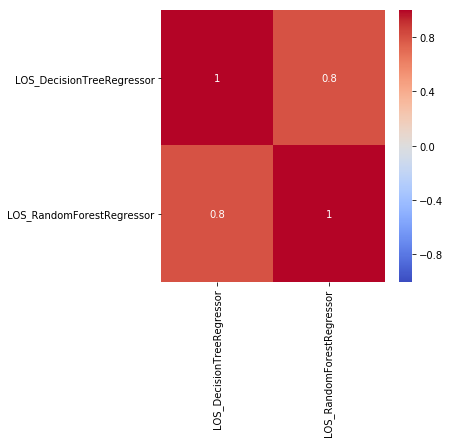

In [12]:
corr_matrix_untuned_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_untuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_untuned_results.png', bbox_inches = 'tight')

In [13]:
df_results.to_csv(r'./DTR+RFR_models_untuned.csv', index = False)

## Parameter tuning for Random Forest Regressor

In [14]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [15]:
# set the parameters by cross-validation
tuned_parameters_RFR = [{
    'max_depth' : [40, 50, 60, 70, 80, 90, 100, 110],
    'max_features' : ['auto','sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_RFR = RandomForestRegressor()
grid_RFR = GridSearchCV(reg_model_RFR, tuned_parameters_RFR)
grid_RFR.fit(X_train, y_train)
reg_model_RFR_optimized = grid_RFR.best_estimator_

# summarize the results of the grid search
print(grid_RFR.best_score_)
print(grid_RFR.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWar

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

-0.2711565028482673
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to

In [16]:
y_test_preds_RFR = reg_model_RFR_optimized.predict(X_test)

df_results['LOS_RandomForestRegressor'] = y_test_preds_RFR

In [17]:
feature_imp_RFR = pd.DataFrame(reg_model_RFR_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (RF Regressor)']).sort_values('Feature importance (RF Regressor)', ascending=False)

feature_imp_RFR

Feature importance (RF Regressor)
AGE                                          0.239839
SEX                                          0.200000
ORIGIN_DOMESTIC                              0.200000
ORIGIN_CHINA                                 0.100000
DAYS_OF_ONSET                                0.060161
ORIGIN_EUROPE                                0.000000
ORIGIN_US                                    0.000000
ORIGIN_ASEAN                                 0.000000
ONSET_FEVER                                  0.000000
ONSET_COUGH                                  0.000000
ONSET_TIRED                                  0.000000
ONSET_SORETHROAT                             0.000000
ONSET_RESPIRATORY                            0.000000
BACKGROUND_DISEASE                           0.000000
HOSPITAL                                     0.000000

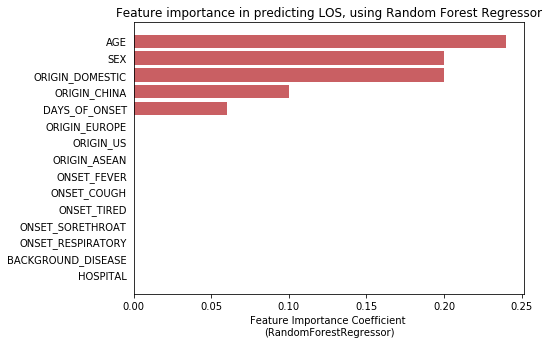

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,15)
ax.barh(ind, feature_imp_RFR['Feature importance (RF Regressor)'].values[0:15], 
        align='center', color='#c44e52', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp_RFR.index[0:15].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Feature importance in predicting LOS, using Random Forest Regressor")
ax.set_xlabel('Feature Importance Coefficient \n(RandomForestRegressor)')
plt.gca().invert_yaxis()
fig.savefig('./feature_importance_GBRegresor.png', bbox_inches = 'tight')

## Parameter tuning for Decision Tree Regressor

In [19]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [20]:
tuned_parameters_DTR = [{
    'max_depth' : [40, 50, 60, 70, 80, 90, 100, 110],
    'max_features' : ['auto','sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]}]

# create and fit a ridge regression model, testing each alpha
reg_model_DTR = DecisionTreeRegressor()
grid_DTR = GridSearchCV(reg_model_DTR, tuned_parameters_DTR)
grid_DTR.fit(X_train, y_train)
reg_model_DTR_optimized = grid_DTR.best_estimator_

# summarize the results of the grid search
print(grid_DTR.best_score_)
print(grid_DTR.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-0.2350912043815808
DecisionTreeRegressor(criterion='mse', max_depth=50, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
# obtain new prediction results and replace into the result dataset
y_test_preds_DTR = reg_model_DTR_optimized.predict(X_test)

df_results['LOS_DecisionTreeRegressor'] = y_test_preds_DTR

In [22]:
# calculate feature importance
feature_imp_DTR = pd.DataFrame(reg_model_DTR_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (DT Regressor)']).sort_values('Feature importance (DT Regressor)', ascending=False)

feature_imp_DTR

Feature importance (DT Regressor)
AGE                                          0.919851
ORIGIN_CHINA                                 0.080149
SEX                                          0.000000
ORIGIN_EUROPE                                0.000000
ORIGIN_US                                    0.000000
ORIGIN_ASEAN                                 0.000000
ORIGIN_DOMESTIC                              0.000000
DAYS_OF_ONSET                                0.000000
ONSET_FEVER                                  0.000000
ONSET_COUGH                                  0.000000
ONSET_TIRED                                  0.000000
ONSET_SORETHROAT                             0.000000
ONSET_RESPIRATORY                            0.000000
BACKGROUND_DISEASE                           0.000000
HOSPITAL                                     0.000000

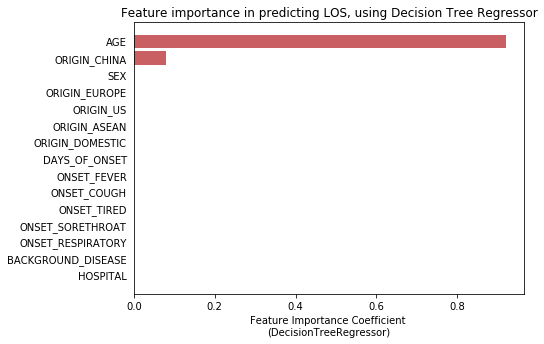

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,15)
ax.barh(ind, feature_imp_DTR['Feature importance (DT Regressor)'].values[0:15], 
        align='center', color='#c44e52', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp_DTR.index[0:15].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Feature importance in predicting LOS, using Decision Tree Regressor")
ax.set_xlabel('Feature Importance Coefficient \n(DecisionTreeRegressor)')
plt.gca().invert_yaxis()
fig.savefig('./feature_importance_GBRegresor.png', bbox_inches = 'tight')

In [24]:
df_results

PATIENT_NO  LOS_DecisionTreeRegressor  LOS_RandomForestRegressor
0          17.0                   8.400000                  11.691429
1          19.0                  13.833333                  11.333810
2          20.0                  19.000000                  13.581184
3          23.0                  19.000000                  13.269756
4          24.0                  19.000000                  14.169756
5          25.0                  19.000000                  13.269756
6          26.0                  19.000000                  13.269756
7          27.0                  13.833333                  14.169756
8          28.0                  19.000000                  14.169756
9          29.0                  19.000000                  14.169756
10         30.0                  19.000000                  13.269756
11         31.0                  13.833333                  14.169756
12         32.0                   8.400000                  11.691429
13         33.0                  19.000000                  14.169756
14         34.0                  13.833333                  13.269756
15         36.0                  13.833333                  12.681184
16         37.0                  19.000000                  12.681184
17         38.0                  13.833333                  11.333810
18         39.0                   8.400000                  12.233810
19         40.0                   8.400000                  11.333810
20         41.0                  19.000000                  13.581184
21         42.0                  13.833333                  12.233810
22         43.0                   8.400000                  11.333810
23         44.0                  13.833333                  13.581184
24         45.0                   8.400000                  12.233810
25         46.0                  13.833333                  12.036667
26         47.0                  13.833333                  12.681184
27         48.0                  13.833333                  12.348095
28         49.0                  19.000000                  14.169756
29         50.0                   8.400000                  12.822381
..          ...                        ...                        ...
121       142.0                   8.400000                  12.822381
122       143.0                  19.000000                  13.269756
123       144.0                   8.400000                  12.822381
124       145.0                  13.833333                  12.936667
125       146.0                   8.400000                  11.922381
126       147.0                   8.400000                  12.822381
127       148.0                  19.000000                  14.169756
128       149.0                  13.833333                  14.169756
129       150.0                  13.833333                  13.567375
130       151.0                  13.833333                  12.681184
131       152.0                  13.833333                  11.333810
132       153.0                  19.000000                  13.269756
133       154.0                   8.400000                  11.691429
134       155.0                   8.400000                  11.922381
135       156.0                   8.400000                  12.822381
136       157.0                  13.833333                  11.448095
137       158.0                  13.833333                  13.581184
138       159.0                  13.833333                  12.348095
139       160.0                  13.833333                  11.805714
140       161.0                  19.000000                  12.681184
141       162.0                  19.000000                  12.681184
142       163.0                  13.833333                  12.681184
143       164.0                   8.400000                  12.822381
144       165.0                  19.000000                  14.169756
145       166.0                   8.400000                  11.922381
146       167.0

In [25]:
df_results.to_csv(r'./DTR+RFR_models_tuned.csv', index = False)

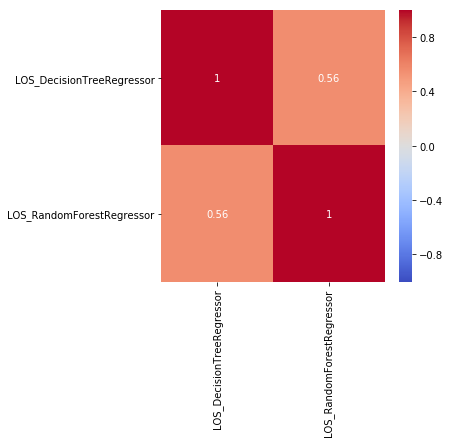

In [26]:
corr_matrix_tuned_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_tuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_tuned_results.png', bbox_inches = 'tight')